In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from matplotlib import pyplot 
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Guvi Tasks/cancer.csv")
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
df.shape

(569, 33)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape  # NO Duplicates found

(569, 33)

In [ ]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
df["Unnamed: 32"]

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
564   NaN
565   NaN
566   NaN
567   NaN
568   NaN
Name: Unnamed: 32, Length: 569, dtype: float64

In [ ]:
df['diagnosis'].value_counts() # beacause B:M rtio is 50% so, I am not using scaler 

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
df["diagnosis"] = df["diagnosis"].map({"M" : 1, "B" : 0})
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [ ]:
df.dtypes  # Check to see if there are any objects

id                           int64
diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
df.drop(["Unnamed: 32","id"], axis =1,inplace=True)
df1=df

In [ ]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

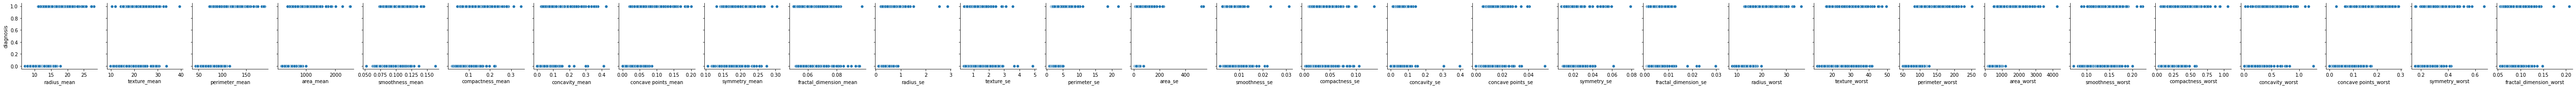

In [ ]:
sns.pairplot(df, x_vars=df.drop(['diagnosis'], axis=1, inplace=False).columns, y_vars= ['diagnosis'],height=2.5 )


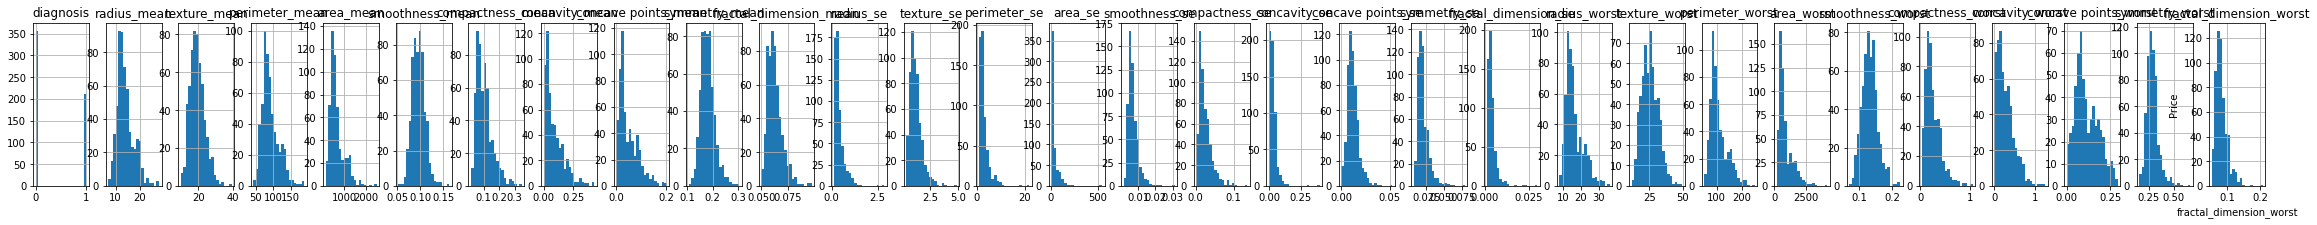

In [ ]:
def histplot(df, listvar):
 fig, axes = plt.subplots(nrows=1, ncols=len(listvar), figsize=(40, 3))
 counter=0
 for ax in axes:
  df.hist(column=listvar[counter], bins=20, ax=axes[counter])
  plt.ylabel('Price')
  plt.xlabel(listvar[counter])
  counter = counter+1
 plt.show()
linear_vars = df.select_dtypes(include=[np.number]).columns
#display(list(linear_vars))
histplot(df,linear_vars)

In [ ]:
print('0 values →', 0 in df.values)

0 values → True


In [ ]:
#check for ouliers
def sorteddf(df, listvar):
    for var in listvar:
        display('sorted by ' + var + ' --> ' + str(list(df[listvar].sort_values(by=var,ascending=False)[var].head())))
sorteddf(df, linear_vars)

'sorted by diagnosis --> [1, 1, 1, 1, 1]'

'sorted by radius_mean --> [28.11, 27.42, 27.22, 25.73, 25.22]'

'sorted by texture_mean --> [39.28, 33.81, 33.56, 32.47, 31.12]'

'sorted by perimeter_mean --> [188.5, 186.9, 182.1, 174.2, 171.5]'

'sorted by area_mean --> [2501.0, 2499.0, 2250.0, 2010.0, 1878.0]'

'sorted by smoothness_mean --> [0.1634, 0.1447, 0.1425, 0.1398, 0.1371]'

'sorted by compactness_mean --> [0.3454, 0.3114, 0.2867, 0.2839, 0.2832]'

'sorted by concavity_mean --> [0.4268, 0.4264, 0.4108, 0.3754, 0.3635]'

'sorted by concave points_mean --> [0.2012, 0.1913, 0.1878, 0.1845, 0.1823]'

'sorted by symmetry_mean --> [0.304, 0.2906, 0.2743, 0.2678, 0.2655]'

'sorted by fractal_dimension_mean --> [0.09744, 0.09575, 0.09502, 0.09296, 0.0898]'

'sorted by radius_se --> [2.873, 2.547, 1.509, 1.37, 1.296]'

'sorted by texture_se --> [4.885, 3.896, 3.647, 3.568, 3.12]'

'sorted by perimeter_se --> [21.98, 18.65, 11.07, 10.12, 10.05]'

'sorted by area_se --> [542.2, 525.6, 233.0, 224.1, 199.7]'

'sorted by smoothness_se --> [0.03113, 0.02333, 0.02177, 0.02075, 0.01835]'

'sorted by compactness_se --> [0.1354, 0.1064, 0.1006, 0.09806, 0.09586]'

'sorted by concavity_se --> [0.396, 0.3038, 0.1535, 0.1438, 0.1435]'

'sorted by concave points_se --> [0.05279, 0.0409, 0.03927, 0.03487, 0.03441]'

'sorted by symmetry_se --> [0.07895, 0.06146, 0.05963, 0.05628, 0.05543]'

'sorted by fractal_dimension_se --> [0.02984, 0.02286, 0.02193, 0.01792, 0.01298]'

'sorted by radius_worst --> [36.04, 33.13, 33.12, 32.49, 31.01]'

'sorted by texture_worst --> [49.54, 47.16, 45.41, 44.87, 42.79]'

'sorted by perimeter_worst --> [251.2, 229.3, 220.8, 214.0, 211.7]'

'sorted by area_worst --> [4254.0, 3432.0, 3234.0, 3216.0, 3143.0]'

'sorted by smoothness_worst --> [0.2226, 0.2184, 0.2098, 0.2006, 0.1909]'

'sorted by compactness_worst --> [1.058, 0.9379, 0.9327, 0.8681, 0.8663]'

'sorted by concavity_worst --> [1.252, 1.17, 1.105, 0.9608, 0.9387]'

'sorted by concave points_worst --> [0.291, 0.2903, 0.2867, 0.2756, 0.2733]'

'sorted by symmetry_worst --> [0.6638, 0.5774, 0.5558, 0.544, 0.5166]'

'sorted by fractal_dimension_worst --> [0.2075, 0.173, 0.1486, 0.1446, 0.1431]'

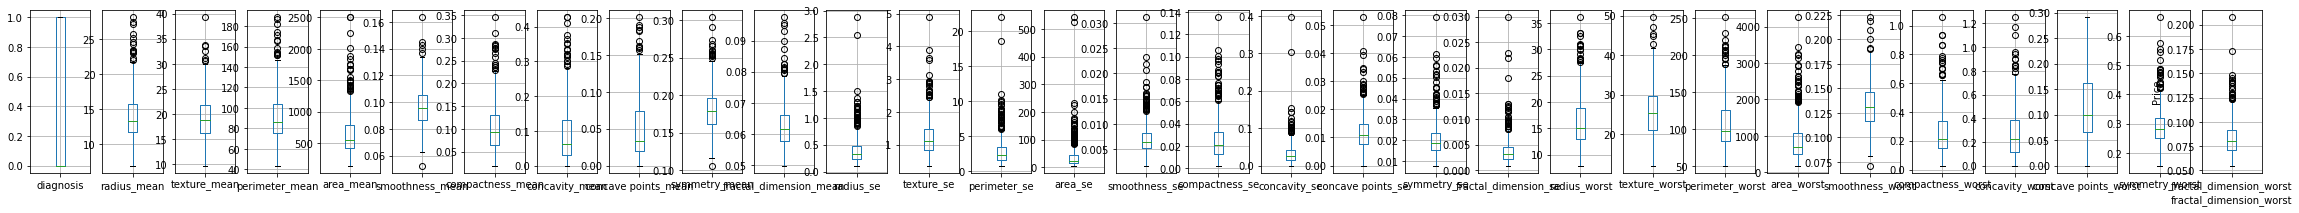

In [ ]:
def dfboxplot(df, listvar):
 fig, axes = plt.subplots(nrows=1, ncols=len(listvar), figsize=(40, 3))
 counter=0
 for ax in axes:
  df.boxplot(column=listvar[counter], ax=axes[counter])
  plt.ylabel('Yes or No')
  plt.xlabel(listvar[counter])
  counter = counter+1
 plt.show()
dfboxplot(df, linear_vars)

In [ ]:
#Remove  outliers

def removeoutliers(df, listvars, z):
    from scipy import stats
    for var in listvars:
        df1 = df[np.abs(stats.zscore(df[var])) < z]
    return df1
df = removeoutliers(df, linear_vars,2)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 542 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                542 non-null    int64  
 1   radius_mean              542 non-null    float64
 2   texture_mean             542 non-null    float64
 3   perimeter_mean           542 non-null    float64
 4   area_mean                542 non-null    float64
 5   smoothness_mean          542 non-null    float64
 6   compactness_mean         542 non-null    float64
 7   concavity_mean           542 non-null    float64
 8   concave points_mean      542 non-null    float64
 9   symmetry_mean            542 non-null    float64
 10  fractal_dimension_mean   542 non-null    float64
 11  radius_se                542 non-null    float64
 12  texture_se               542 non-null    float64
 13  perimeter_se             542 non-null    float64
 14  area_se                  5

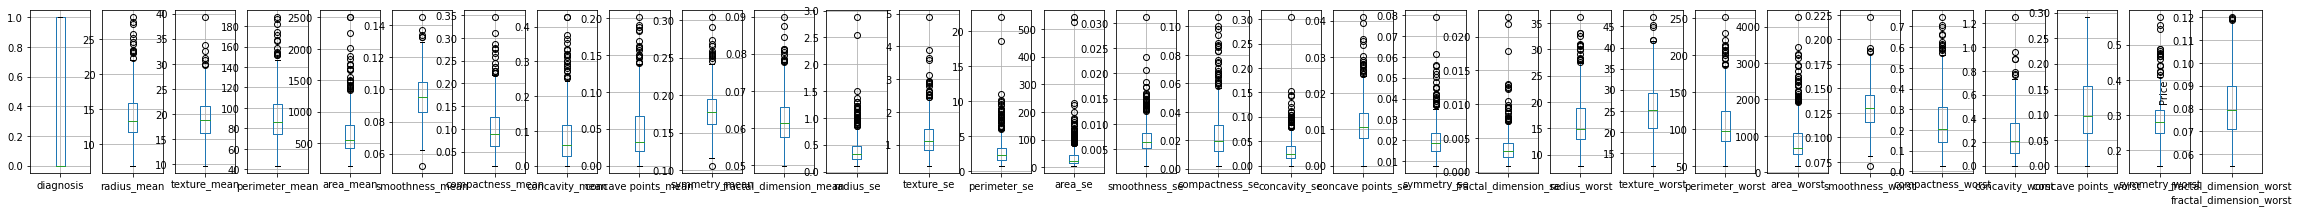

In [ ]:
dfboxplot(df, linear_vars) # After Removing Outliers



```
#Gaussian-distribution-in-data-science

# this log converts dataframe's features inplace
def convertfeatures2log(df, listvars):
   for var in listvars:
      df[var] = np.log(df[var])
convertfeatures2log(df, linear_vars)
```



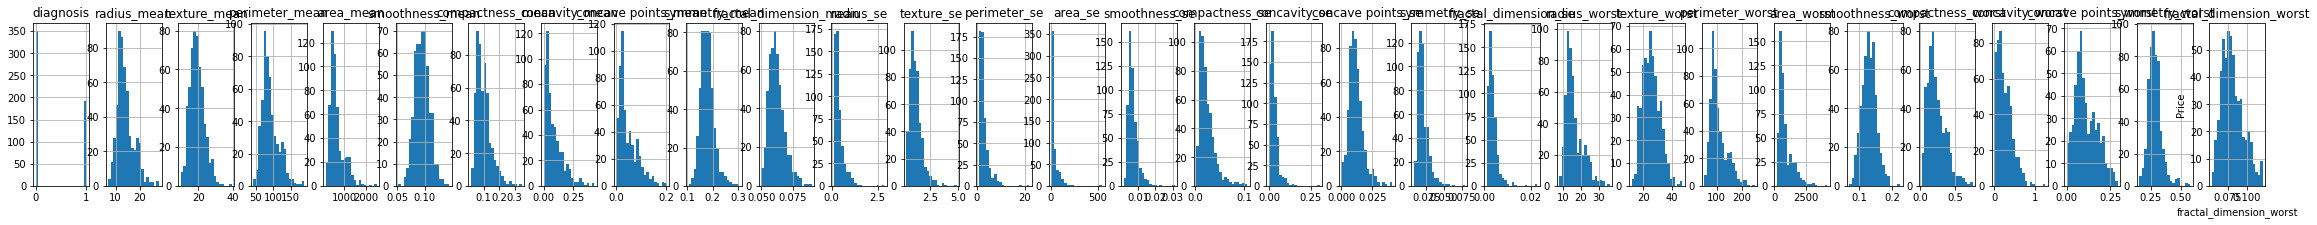

In [ ]:
histplot(df, linear_vars)

In [ ]:
X_df = df.drop(['diagnosis'], axis=1)
y_df = df[['diagnosis']]


In [ ]:
df_le = X_df.copy()
# add a new column in dataframe — join 2 dataframe columns-wise
df_le['diagnosis'] = y_df['diagnosis'].values
df_le.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
radius_mean,1.000000,0.315429,0.998043,0.987314,0.205284,0.560971,0.725871,0.841406,0.172790,-0.317069,...,0.299685,0.966701,0.940654,0.155330,0.506827,0.606959,0.779072,0.193134,0.039534,0.752404
texture_mean,0.315429,1.000000,0.318230,0.316404,-0.035711,0.209498,0.283999,0.275556,0.042968,-0.106825,...,0.910263,0.343735,0.338350,0.049257,0.231196,0.265386,0.266491,0.062780,0.055577,0.396709
perimeter_mean,0.998043,0.318230,1.000000,0.986813,0.238221,0.607696,0.761273,0.866657,0.204036,-0.269634,...,0.301486,0.971047,0.940882,0.181316,0.545011,0.638758,0.801435,0.213134,0.080268,0.761096
area_mean,0.987314,0.316404,0.986813,1.000000,0.211406,0.553423,0.734955,0.842228,0.175824,-0.286667,...,0.293835,0.961292,0.959219,0.159678,0.483900,0.592726,0.757169,0.173456,0.037802,0.732541
smoothness_mean,0.205284,-0.035711,0.238221,0.211406,1.000000,0.634308,0.510153,0.550881,0.530370,0.535789,...,0.012584,0.260944,0.232186,0.795326,0.444066,0.409586,0.487701,0.348302,0.462506,0.341699
compactness_mean,0.560971,0.209498,0.607696,0.553423,0.634308,1.000000,0.891950,0.844431,0.568770,0.498066,...,0.201320,0.630813,0.553100,0.514686,0.871486,0.810946,0.809436,0.451420,0.646768,0.588102
concavity_mean,0.725871,0.283999,0.761273,0.734955,0.510153,0.891950,1.000000,0.934351,0.464846,0.258527,...,0.271510,0.766013,0.715505,0.422628,0.783452,0.894876,0.864190,0.373278,0.473747,0.704118
concave points_mean,0.841406,0.275556,0.866657,0.842228,0.550881,0.844431,0.934351,1.000000,0.446949,0.119313,...,0.273605,0.866796,0.822747,0.444060,0.715165,0.785752,0.913796,0.357073,0.362561,0.776519
symmetry_mean,0.172790,0.042968,0.204036,0.175824,0.530370,0.568770,0.464846,0.446949,1.000000,0.417937,...,0.046480,0.230710,0.194434,0.380276,0.428553,0.382730,0.398413,0.683465,0.378974,0.309813
fractal_dimension_mean,-0.317069,-0.106825,-0.269634,-0.286667,0.535789,0.498066,0.258527,0.119313,0.417937,1.000000,...,-0.108942,-0.222162,-0.243990,0.428520,0.363297,0.233518,0.097265,0.242146,0.743055,-0.080401




```
                         fractal_dimension_worst  diagnosis  
radius_mean                             0.039534   0.752404  
texture_mean                            0.055577   0.396709  
perimeter_mean                          0.080268   0.761096  
area_mean                               0.037802   0.732541  
smoothness_mean                         0.462506   0.341699  
compactness_mean                        0.646768   0.588102  
concavity_mean                          0.473747   0.704118  
concave points_mean                     0.362561   0.776519  
symmetry_mean                           0.378974   0.309813  
fractal_dimension_mean                            -0.080401  
radius_se                               0.069424   0.589593  
texture_se                                         0.000710  
perimeter_se                            0.120295   0.576558  
area_se                                 0.041096   0.566620  
smoothness_se                                     -0.053354  
compactness_se                          0.531517   0.276611  
concavity_se                            0.434518   0.301409  
concave points_se                       0.314808   0.435887  
symmetry_se                                       -0.007631  
fractal_dimension_se                               0.067308  
radius_worst                            0.118121   0.791493  
texture_worst                           0.130896   0.432413  
perimeter_worst                         0.165592   0.795235  
area_worst                              0.109776   0.750902  
smoothness_worst                        0.574391   0.396895  
compactness_worst                       0.743620   0.595200  
concavity_worst                         0.602013   0.669092  
concave points_worst                    0.483802   0.787152  
symmetry_worst                          0.464924   0.386130  
fractal_dimension_worst                            0.280785  
diagnosis                               0.280785   1.000000  
```



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.3, random_state=42)

In [ ]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import lazypredict 
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:01<00:00, 15.82it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,0.99,0.99,0.99,0.99,0.06
PassiveAggressiveClassifier,0.98,0.97,0.97,0.98,0.03
Perceptron,0.97,0.97,0.97,0.97,0.02
LinearSVC,0.97,0.97,0.97,0.97,0.04
SGDClassifier,0.96,0.97,0.97,0.96,0.05
AdaBoostClassifier,0.97,0.96,0.96,0.97,0.18
XGBClassifier,0.96,0.95,0.95,0.96,0.21
ExtraTreesClassifier,0.96,0.95,0.95,0.96,0.15
CalibratedClassifierCV,0.96,0.95,0.95,0.96,0.08


              precision    recall  f1-score   support

           0       0.94      0.98      0.96       104
           1       0.96      0.90      0.93        59

    accuracy                           0.95       163
   macro avg       0.95      0.94      0.95       163
weighted avg       0.95      0.95      0.95       163



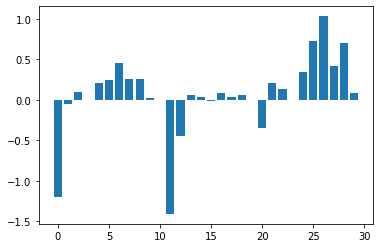

In [ ]:
from sklearn.svm import SVC
# Fitting the SVM 
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_test_predict = clf.predict(X_test)

print(classification_report(y_test,y_test_predict))

# Based on the below Code I am removing less important features and will use only most important features
mylist = clf.coef_.tolist()

mylist = clf.coef_.tolist()
pyplot.bar([x for x in range(len(mylist[0]))],  [mylist[0][i] for i in range(len(mylist[0]))])
pyplot.show()

In [ ]:
for x in range(len(mylist[0])):
  print(x, ' : ', mylist[0][x])

In [ ]:


```
#This is for reference, Below is for all the columns
0  :  0.20994269078082223    'radius_mean'
1  :  -0.07948367541638568   'texture_mean'
2  :  0.25937692070477164    'perimeter_mean'
3  :  0.27763651514846766    'area_mean'
4  :  -0.06876432343868366   'smoothness_mean'
5  :  0.21070735798473889    'compactness_mean'
6  :  0.7394289528182729     'concavity_mean'
7  :  0.43264811766811145    'concave points_mean'
8  :  0.07631999562975622    'symmetry_mean'
9  :  -0.5735429603981417    'fractal_dimension_mean'
10  :  0.70243287365331      'radius_se'
11  :  -0.3775430041704316   'texture_se'
12  :  0.48479783567895474   'perimeter_se'
13  :  0.5849457986411584    'area_se'
14  :  0.09116822917464867   'smoothness_se'
15  :  -0.2930434817056045   'compactness_se'
16  :  -0.4325819569513074   'concavity_se'
17  :  -0.50720668408004     'concave points_se'
18  :  0.19250068101478102   'symmetry_se'
19  :  -0.6071726810182068   'fractal_dimension_se'
20  :  1.0041630033878124    'radius_worst'
21  :  1.110169674045807     'texture_worst'
22  :  1.005211940880383     'perimeter_worst'
23  :  0.8985077298536528    'area_worst'
24  :  0.7367200353353545    'smoothness_worst'
25  :  0.25552448671897965   'compactness_worst'
26  :  0.08420105013022683   'concavity_worst'
27  :  0.15349129497791753   'concave points_worst'
28  :  -0.4233505178801944   'symmetry_worst'
29  :  0.9614556882709434    'fractal_dimension_worst'

```
Removing all columuns that has co efficents less than 25

In [ ]:
x1=df[['radius_mean', 'perimeter_mean', 'area_mean',  'concave points_mean', 'radius_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst']]
y1=df["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=42)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       104
           1       0.96      0.90      0.93        59

    accuracy                           0.95       163
   macro avg       0.95      0.94      0.95       163
weighted avg       0.95      0.95      0.95       163



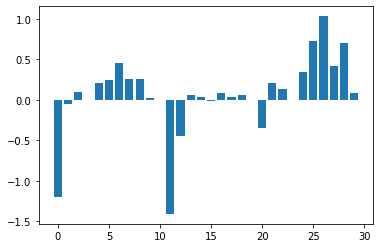

0  :  -1.1974276453759556
1  :  -0.05688866630334921
2  :  0.10073775529335194
3  :  -0.002011920020237312
4  :  0.20998959225359182
5  :  0.24754082306936873
6  :  0.45477964737714666
7  :  0.258507345110872
8  :  0.2620610153490722
9  :  0.02778891079738425
10  :  -5.872764399787733e-05
11  :  -1.4081126390149112
12  :  -0.449028793828762
13  :  0.05761305375235537
14  :  0.04078891924837788
15  :  -0.007977106827566608
16  :  0.0798177495854169
17  :  0.03568480515609321
18  :  0.059602830614911596
19  :  -0.00752123322397735
20  :  -0.347956308672015
21  :  0.20438489689964
22  :  0.1376669273943989
23  :  0.004764793191100125
24  :  0.3481178295968227
25  :  0.7300094162666795
26  :  1.032916641345298
27  :  0.4140709823396953
28  :  0.7007812478036346
29  :  0.08436064126286494


In [ ]:
from sklearn.svm import SVC
# Fitting the SVM 
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_test_predict = clf.predict(X_test)

print(classification_report(y_test,y_test_predict))

# Based on the below Code I am removing less important features and will use only most important features
mylist = clf.coef_.tolist()

mylist = clf.coef_.tolist()
pyplot.bar([x for x in range(len(mylist[0]))],  [mylist[0][i] for i in range(len(mylist[0]))])
pyplot.show()
for x in range(len(mylist[0])):
  print(x, ' : ', mylist[0][x])

In [ ]:
x1=df[[  'concave points_mean',  'area_se',  'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst']]
y1=df["diagnosis"]
# Removed Few Columns and seeing if this increases the accuracy

In [ ]:
#Balancing the classes
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy='all')
X_smt, y_smt = smt.fit_resample(x1, y1)
X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, test_size=0.3, random_state=42)

In [ ]:
#applying standard scallar to get the standardize the data 
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00        83

    accuracy                           1.00       184
   macro avg       1.00      1.00      1.00       184
weighted avg       1.00      1.00      1.00       184



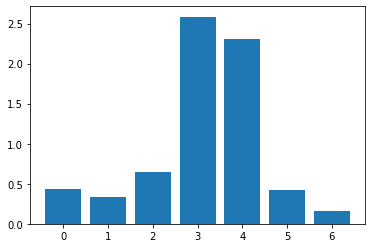

0  :  0.438168993821653
1  :  0.3351662656819367
2  :  0.6488778034581448
3  :  2.5855154904145987
4  :  2.3011402807692587
5  :  0.41917205694498816
6  :  0.15497181704286


In [ ]:
from sklearn.svm import SVC
# Fitting the SVM 
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_test_predict = clf.predict(X_test)

print(classification_report(y_test,y_test_predict))

# Based on the below Code I am removing less important features and will use only most important features
mylist = clf.coef_.tolist()

mylist = clf.coef_.tolist()
pyplot.bar([x for x in range(len(mylist[0]))],  [mylist[0][i] for i in range(len(mylist[0]))])
pyplot.show()
for x in range(len(mylist[0])):
  print(x, ' : ', mylist[0][x])



# Using xgbost to see if there is any diffenrence

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_train,y_train) #train the model
  model.score(X_test, y_test) # scoring the model - r2 squared
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  0.8596736892468396  Cross-Val score :  0.8327147749237819
Learning rate :  0.02  Train score :  0.9791727653653561  Cross-Val score :  0.9462485532596565
Learning rate :  0.03  Train score :  0.9957481074780183  Cross-Val score :  0.961900098771501
Learning rate :  0.04  Train score :  0.9987662296248399  Cross-Val score :  0.9637838307423335
Learning rate :  0.05  Train score :  0.999541256024669  Cross-Val score :  0.9650048191875319
Learning rate :  0.06  Train score :  0.9997582950796702  Cross-Val score :  0.9639912400812467
Learning rate :  0.07  Train score :  0.999871975514057  Cross-Val score :  0.9629300244749031
Learning rate :  0.08  Train score :  0.9999141418394719  Cross-Val score :  0.9647208493223547
Learning rate :  0.09  Train score :  0.9999302520525316  Cross-Val score :  0.9643495676738117
Learning rate :  0.1  Train score :  0.9999585892678453  Cross-Val score :  0.9629184369967675
Learning rate :  0.11  Train score :  0.9999

In [ ]:
model = xgb.XGBRegressor(learning_rate = 0.04, n_estimators=100)
model.fit(X_train,y_train) #train the model
model.score(X_test, y_test)

[15:31:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8891333754216643

In [ ]:
from sklearn.ensemble import VotingRegressor # this is the function that ensembles my model
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

model1 = SVR(C=1.0, epsilon=0.2)
model2 = tree.DecisionTreeRegressor(random_state=1)
model3 = KNeighborsRegressor(3)
model = VotingRegressor(estimators=[('lr', model1), ('dt', model2),('knn',model3)]) # it will stitich all the models together, voting = hard means max voting 
# we need to give the list of models that we are trying to combine
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9533012346493941

# EDA

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Guvi Tasks/cancer.csv")
df.head(2)

In [21]:
xe=df[[  'concave points_mean',  'area_se',  'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst']].head(100)
ye=df["diagnosis"].head(500)
xe["diagnosis"]=df["diagnosis"].head(100)
xe["diagnosis"] = xe["diagnosis"].map({"M" : 1, "B" : 0})


In [28]:
xe.corr()

,concave points_mean,area_se,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,diagnosis
concave points_mean,1.000000,0.737816,0.305306,0.814237,0.740768,0.431555,0.637957,0.714925
area_se,0.737816,1.000000,0.126217,0.845167,0.849048,0.046970,0.270486,0.555920
texture_worst,0.305306,0.126217,1.000000,0.378725,0.334856,0.321346,0.424733,0.515407
perimeter_worst,0.814237,0.845167,0.378725,1.000000,0.975255,0.189493,0.451433,0.723523
area_worst,0.740768,0.849048,0.334856,0.975255,1.000000,0.153067,0.345973,0.653432
smoothness_worst,0.431555,0.046970,0.321346,0.189493,0.153067,1.000000,0.621739,0.408408
compactness_worst,0.637957,0.270486,0.424733,0.451433,0.345973,0.621739,1.000000,0.576255
diagnosis,0.714925,0.555920,0.515407,0.723523,0.653432,0.408408,0.576255,1.000000


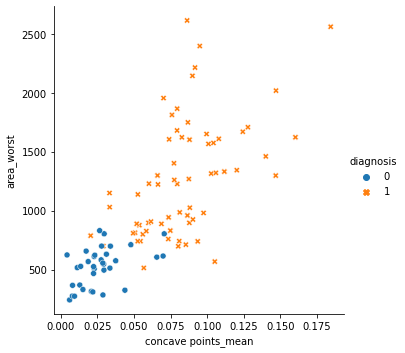

In [35]:
sns.relplot(data=xe, x="concave points_mean", y="area_worst",hue='diagnosis',style='diagnosis' ) 

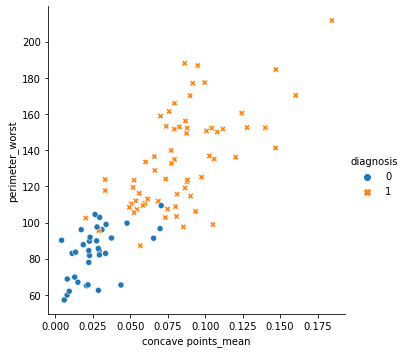

In [36]:
sns.relplot(data=xe, x="concave points_mean", y="perimeter_worst",hue='diagnosis',style='diagnosis' ) 

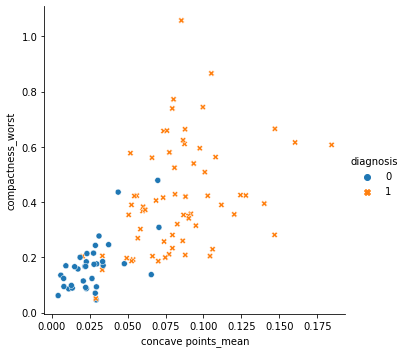

In [37]:
sns.relplot(data=xe, x="concave points_mean", y="compactness_worst",hue='diagnosis',style='diagnosis' ) 

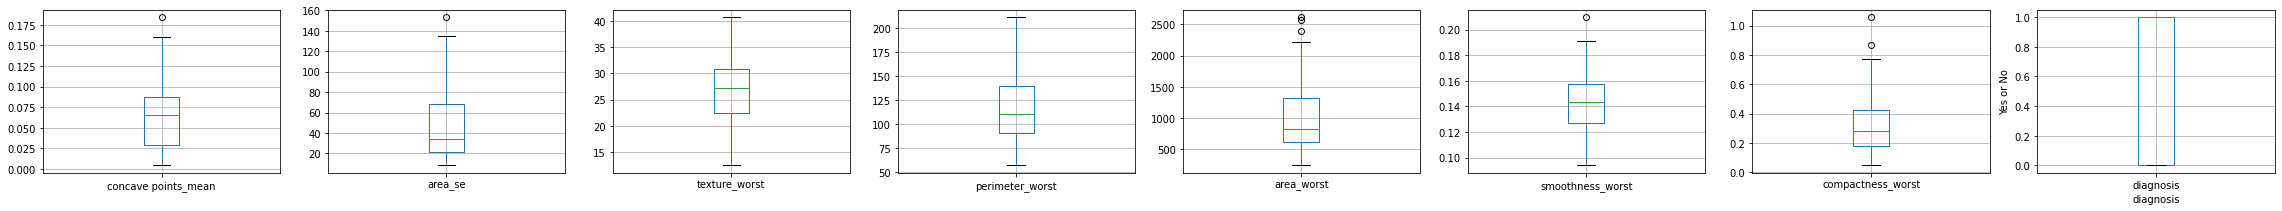

In [41]:
def dfboxplot(df, listvar):
 fig, axes = plt.subplots(nrows=1, ncols=len(listvar), figsize=(40, 3))
 counter=0
 for ax in axes:
  df.boxplot(column=listvar[counter], ax=axes[counter])
  plt.ylabel('Yes or No')
  plt.xlabel(listvar[counter])
  counter = counter+1
 plt.show()

linear_vars = xe.select_dtypes(include=[np.number]).columns
dfboxplot(xe,linear_vars)

In [ ]:
#sns.heatmap(xe.isnull(),yticklabels=False,cbar=False,cmap='viridis')